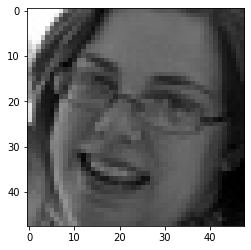

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Location of data
DATADIR = "Happy_Sad/train"
CATEGORIES = ["happy", "sad"]

# Checking file path
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to train happy or sad dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
# Checking shape
print(img_array.shape)

(48, 48)


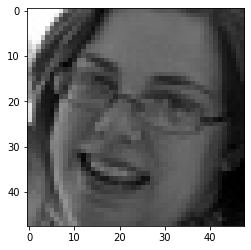

In [3]:
# Resizing
IMG_SIZE = 48

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

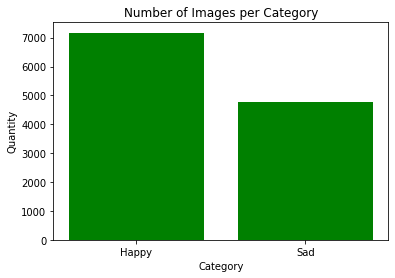

In [4]:
# data set
x = ['Happy', 'Sad']
y = [len(os.listdir(os.path.join(DATADIR, 'happy'))), len(os.listdir(os.path.join(DATADIR, 'sad')))]

# plot stacked bar chart 
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Number of Images per Category')
plt.bar(x, y, color='g')
plt.show()

In [5]:
# Proccessing data function
def create_training_data(direc, categories):
    temp_data = []                             # Temporary array
    for category in categories:                # For both happy and sad data
        path = os.path.join(direc, category)   # Find file path
        class_num = CATEGORIES.index(category) # Determine image class happy or sad/ 1 or 0
        for img in os.listdir(path)[:4774]:    # Loop through images - limited to 4830 to even happy and sad data
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # Read in grey scale image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))               # Resize image
                temp_data.append([new_array, class_num])                              # Append to temporary array
            except Exception as e:                                                    # Check for issue
                print('Image failed to process: ' + e)
    return temp_data                                                                  # Return processed data set
            
training_data = create_training_data(DATADIR, CATEGORIES)
print(len(training_data))                                                             # Length should be double 4774

9548


In [6]:
print(training_data[:1]) # Example image array data

[[array([[255, 254, 255, ...,  65,  64,  51],
       [255, 255, 253, ...,  47,  55,  62],
       [255, 253, 255, ...,  50,  51,  50],
       ...,
       [118, 116,  91, ...,   4,   8,  12],
       [112, 106,  91, ...,   7,   6,  10],
       [111,  99,  81, ...,   8,  12,  16]], dtype=uint8), 0]]


In [7]:
import random

random.shuffle(training_data) # Shuffle data to prevent bias

for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
0
1
0
1
1
0


In [8]:
X = [] # Image arrays
y = [] # Image classification

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Shape data
y = np.asarray(y)

In [9]:
import pickle

pickle_out = open("X2.pickle", "wb")
pickle.dump(X, pickle_out)           # Export X data as pickle file
pickle_out.close()

pickle_out = open("y2.pickle", "wb")
pickle.dump(y, pickle_out)           # Export y data as pickle file
pickle_out.close()